In [1]:
# Most of this code will be following the Kaggle Kernel https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import RidgeCV
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import skew
from scipy.special import boxcox1p

In [3]:
%run "Auxiliary Functions.ipynb"

In [4]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
#trtecombined = train.append(test)
print(train.shape,test.shape)


(1460, 81) (1459, 80)


In [5]:
train['SalePrice'] = np.log1p(train['SalePrice'])

In [6]:
(train.select_dtypes('object')).columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

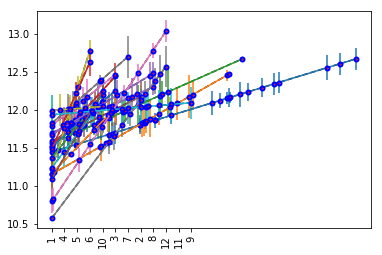

In [7]:
train = train[train.GrLivArea<4500]
train = train[train.GarageArea<1220]
train = train[train.TotRmsAbvGrd<12]

#Converting cartain numerical categories to numerical ones with monotonic relationship
cattonum1(train,test,'Neighborhood','SalePrice')
cattonum1(train,test,'Exterior1st','SalePrice')
cattonum1(train,test,'Exterior2nd','SalePrice')
cattonum1(train,test,'SaleCondition','SalePrice')
cattonum1(train,test,'Condition1','SalePrice')
#cattonum(train,test,'Condition2','SalePrice')
cattonum1(train,test,'HouseStyle','SalePrice')
cattonum1(train,test,'RoofStyle','SalePrice')
cattonum1(train,test,'RoofMatl','SalePrice')
cattonum1(train,test,'ExterQual','SalePrice')
cattonum1(train,test,'ExterCond','SalePrice')
cattonum1(train,test,'Foundation','SalePrice')
cattonum1(train,test,'Heating','SalePrice')
cattonum1(train,test,'HeatingQC','SalePrice')
cattonum1(train,test,'KitchenQual','SalePrice')
cattonum1(train,test,'SaleType','SalePrice')

#cattonum(train,test,'MSSubClass','SalePrice')
cattonum1(train,test,'MSZoning','SalePrice')

cattonum1(train,test,'OverallQual','SalePrice')
cattonum1(train,test,'TotRmsAbvGrd','SalePrice')

cattonum1(train,test,'YrSold','SalePrice')
cattonum1(train,test,'MoSold','SalePrice')
#cattonum1(train,test,'GarageCars','SalePrice')
#cattonum1(train,test,'OverallCond','SalePrice')

In [8]:
numeric_feats = train.dtypes[train.dtypes != "object"].index

skewed_feats = train[numeric_feats].apply(lambda x: skew(x.dropna())) #compute skewness
skewed_feats = skewed_feats[skewed_feats > 0.75]
skewed_feats = skewed_feats.index
#print(skewed_feats)
train[skewed_feats] = np.log1p(train[skewed_feats])
#train[skewed_feats] = boxcox1p(train[skewed_feats],0.15)

In [9]:
#train = train.assign(TotalSF=pd.Series(np.zeros(train.shape[0])).values)
#train['TotalSF'] = train['1stFlrSF']+train['2ndFlrSF']+train['TotalBsmtSF']
#train.drop(['1stFlrSF','2ndFlrSF','TotalBsmtSF'],axis=1,inplace=True)
#test = test.assign(TotalSF=pd.Series(np.zeros(test.shape[0])).values)
#test['TotalSF'] = test['1stFlrSF']+test['2ndFlrSF']+test['TotalBsmtSF']
#test.drop(['1stFlrSF','2ndFlrSF','TotalBsmtSF'],axis=1,inplace=True)

(1443, 51)


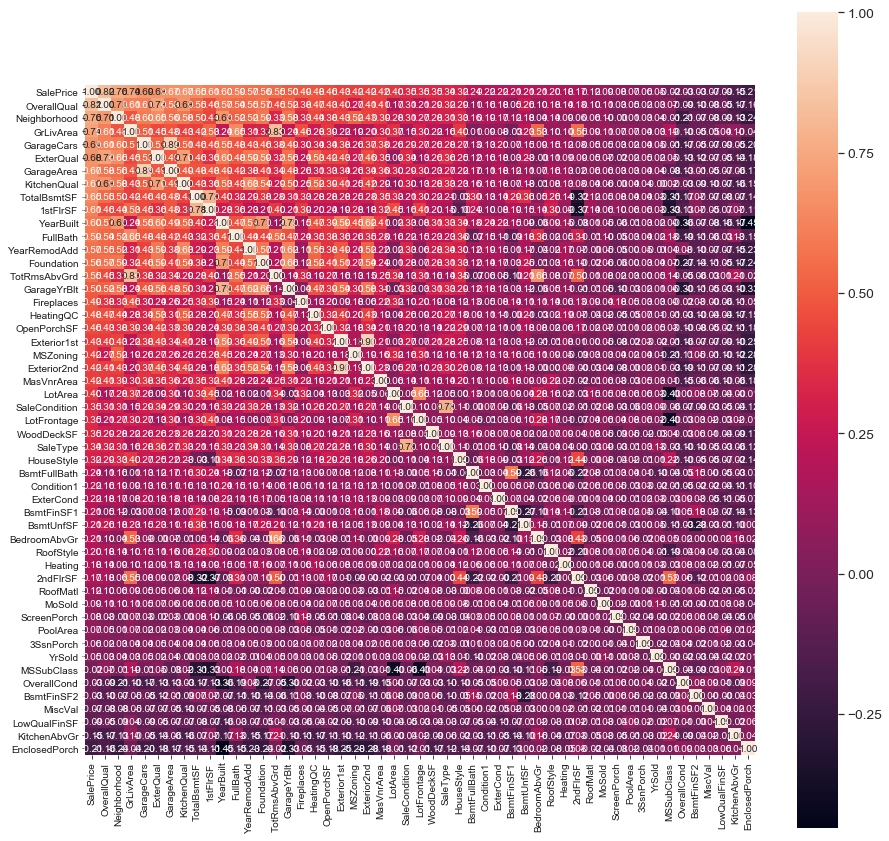

[0.22445326362047838, 0.19994539644648388, 0.16879377650476193, 0.16271280208695835, 0.16183632196947378, 0.15974986721552684, 0.1571954437471608, 0.14788618251211322, 0.14770128578325856, 0.14582491009364165, 0.14528855856276635, 0.14316051002034408, 0.143102110120951, 0.14308900631224652, 0.14192990586482127, 0.13856453953659917, 0.13797326150267672, 0.13795283795948687, 0.1379261649124057, 0.13419249784748438, 0.13406763114983408, 0.13406782922016958, 0.13074653333368855, 0.12941882177895347, 0.129404541699491, 0.12851022801101325, 0.12847627746420429, 0.12844043326680005, 0.12534071404348895, 0.12383395963054236, 0.1231442515951236, 0.11948526603717684, 0.11950694147494488, 0.11925583566440444, 0.11925578173330754, 0.11920083855676537, 0.11882625598081165, 0.11883898038714762, 0.1177638071216596, 0.11770643046369025, 0.11761473718467447, 0.11724440825126295, 0.11683975072758664, 0.11642393786742197, 0.11641854859930142, 0.11637648119077165, 0.11616431057992019, 0.11599113847690444,

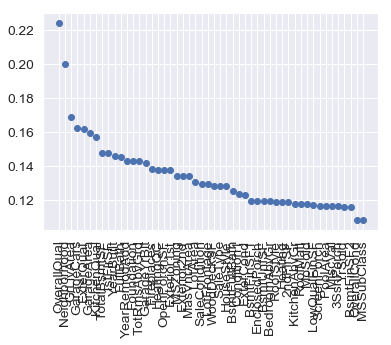

In [10]:
#Now let us try features engineering with each variable by considering each one individually. The challenge will be to get
#better features but not Overfitting
train_cont = dropcategorical(train,test,4)[0]#Note that drop categorical also drops non-numerical values
test_fin = dropcategorical(train,test,4)[1]#Note that drop categorical also drops non-numerical values

train_cont.drop('Id',axis=1,inplace=True)
test_fin.drop('Id',axis=1,inplace=True)

train_cont = train_cont.fillna(train_cont.mean())
test_fin = test_fin.fillna(test_fin.mean())


#train_cont = train_cont[train_cont.GarageArea!=0]
print(train_cont.shape)

###OverallQual
#plt.plot(train_cont['OverallQual'],train_cont['SalePrice'],'bo')

#The feature looks like it has an exponential dependence so maybe change it to an exponential of itself
#train_cont['OverallQual'] = np.exp(0.5*train['OverallQual'])
#test_fin['OverallQual'] = np.exp(0.5*test['OverallQual'])
# scan by hand finds 0.5 as the coefficient which minimes the error
#Now to make a heat map of the corelation matrix

# This looks like a more or less linear relationship as we would expect. But lets play around with it a little bit
#n = 1 works best

#train_cont['Neighborhood'] = train['Neighborhood']**1.5
#test_fin['Neighborhood'] = test_fin['Neighborhood']**1.5

#train_cont['GarageArea'] = train_cont['GarageArea']**1
#test_fin['GarageArea'] = test_fin['GarageArea']**1

train_cont['OverallCond'] = train['OverallCond']**0.7
test_fin['OverallCond'] = test['OverallCond']**0.7

#train_cont['GrLivArea'] = np.log1p(train_cont['GrLivArea'])
#test_fin['GrLivArea'] = np.log1p(test_fin['GrLivArea'])

corrmat = train_cont.corr()
f, ax = plt.subplots(figsize=(15, 15))
#sns.heatmap(corrmat, vmax=.8, square=True);
k = train_cont.shape[1] #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train_cont[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

el = []
for x in range(1,train_cont.shape[1]):
    el.append(withncontfeatures(train_cont,test_fin,x)[0])
labels = withncontfeatures(train_cont,test_fin,x)[2]
plt.plot(range(1,train_cont.shape[1]),el,'bo')
plt.xticks(range(1,train_cont.shape[1]), labels, rotation='vertical')

print(el)

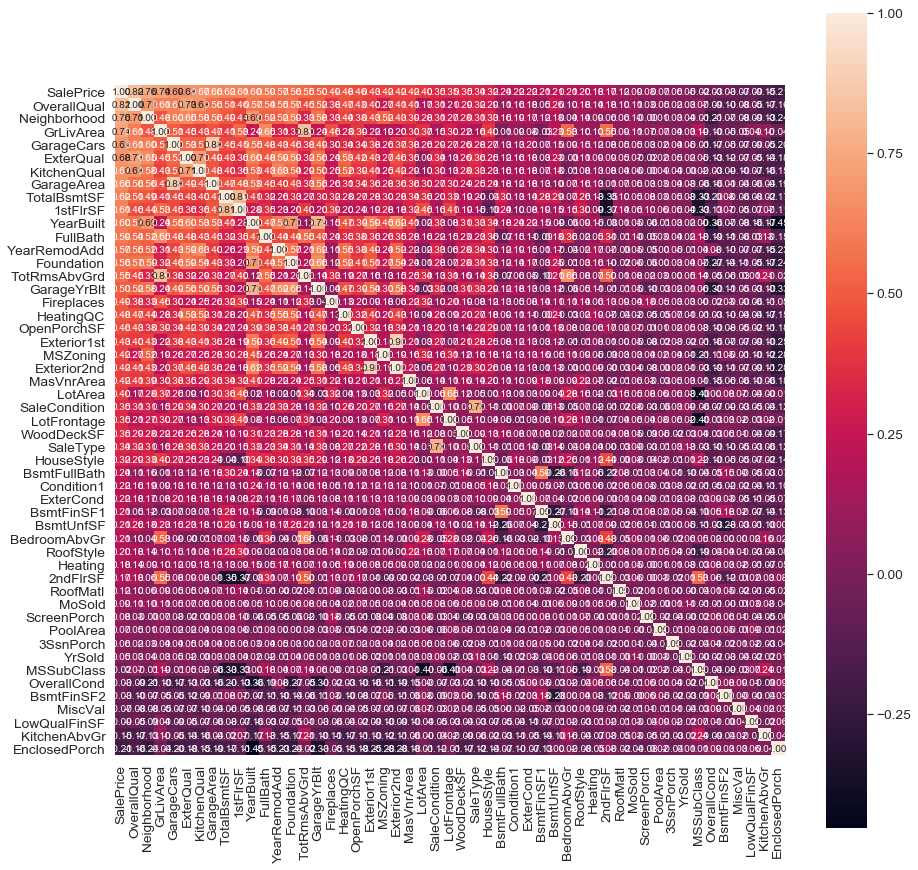

[0.22445326362047838, 0.19994539644648388, 0.16879377650476193, 0.16271280208695835, 0.16183632196947378, 0.15911295595559594, 0.15771802112969874, 0.14881087257180467, 0.14862170918390544, 0.14719337282349537, 0.14649805181312925, 0.14427087530469762, 0.14426503909831068, 0.14424659454836794, 0.14293442347609064, 0.13964158553971548, 0.1391244199222249, 0.139107818086148, 0.1390654508264454, 0.135884459235687, 0.13581856221039573, 0.13581466109504917, 0.13247188646456046, 0.13097936734319218, 0.1309575879624434, 0.12990596510100386, 0.12989788313911713, 0.1298513621313466, 0.12658745328206628, 0.12506176585681567, 0.12435342652075418, 0.1203276128160576, 0.12032470933467679, 0.12027338708691704, 0.12027106377479972, 0.12020770247950292, 0.11979752572329484, 0.11985424663377262, 0.118549628144887, 0.11852269260525776, 0.1183723381602845, 0.11800468156698679, 0.117598213273293, 0.11712177731492553, 0.11711098137229732, 0.11708223853704058, 0.11686078664061057, 0.11677323898342418, 0.109

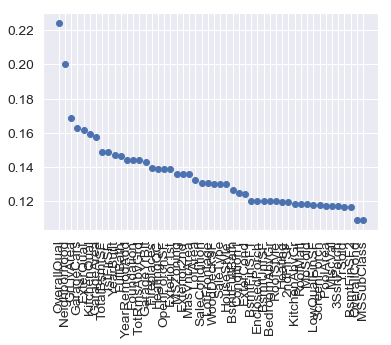

In [11]:
train_cont['TotalBsmtSF'][train['TotalBsmtSF']<10]=600 #shifts the 0 points close to the points
train_cont['TotalBsmtSF']=np.log1p(train_cont['TotalBsmtSF']) #shifts the 0 points close to the points

test_fin['TotalBsmtSF'][test['TotalBsmtSF']<10]=600 #shifts the 0 points close to the points
test_fin['TotalBsmtSF']=np.log1p(test_fin['TotalBsmtSF']) #shifts the 0 points close to the points


train_cont['GarageArea'][train['GarageArea']<10]=200 #shifts the 0 points close to the points
train_cont['GarageArea']=np.log1p(train_cont['GarageArea']) #shifts the 0 points close to the points

test_fin['GarageArea'][test['GarageArea']<10]=200 #shifts the 0 points close to the points
test_fin['GarageArea']=np.log1p(test_fin['GarageArea']) #shifts the 0 points close to the points

train_cont['1stFlrSF']=np.log1p(train['1stFlrSF']) #shifts the 0 points close to the points
test_fin['1stFlrSF']=np.log1p(test['1stFlrSF']) #shifts the 0 points close to the points

#plt.plot(train_cont['GarageArea'],train_cont['SalePrice'],'bo')

#Now to make a heat map of the corelation matrix
corrmat = train_cont.corr()
f, ax = plt.subplots(figsize=(15, 15))
#sns.heatmap(corrmat, vmax=.8, square=True);
k = train_cont.shape[1] #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train_cont[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

el = []
for x in range(1,train_cont.shape[1]):
    el.append(withncontfeatures(train_cont,test_fin,x)[0])
labels = withncontfeatures(train_cont,test_fin,x)[2]
ans = np.exp(withncontfeatures(train_cont,test_fin,x)[3])
plt.plot(range(1,train_cont.shape[1]),el,'bo')
plt.xticks(range(1,train_cont.shape[1]), labels, rotation='vertical')

print(el)


In [12]:
saleprice = pd.DataFrame(ans, columns=['SalePrice'])
results = pd.concat([test['Id'],saleprice['SalePrice']],axis=1)
results.head()

,Id,SalePrice
0,1461,114098.829635
1,1462,146405.943436
2,1463,178181.628153
3,1464,198361.484692
4,1465,195151.530632


In [13]:
results.to_csv('housepricing_submission.csv', index = False)

In [14]:
0.10820959194772584

0.10820959194772584

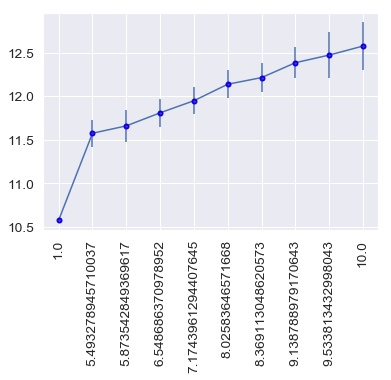

In [15]:
cattonum(train,test,'TotRmsAbvGrd','SalePrice')